In [96]:
import pandas as pd
import numpy as np
import calendar
import seaborn as sns

url = 'https://raw.githubusercontent.com/artemedius/repo/main/superstore_sales.csv'
df = pd.read_csv(url, index_col=0, encoding= "unicode_escape")
df.columns = df.columns.str.lower()
df[['order date','ship date']] = df[['order date','ship date']].apply(pd.to_datetime)
df = df.reset_index().drop(['Row ID', 'country'], axis=1)

##### Top ten states by total sales

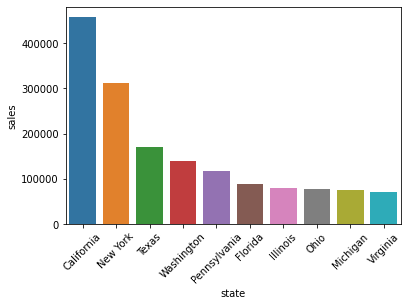

In [97]:
sbs = pd.DataFrame(df.groupby(['state'])['sales'].sum()).reset_index() #sales by state (SBS)
sbs['percent'] = sbs['sales']/sbs['sales'].sum()
sbshort = sbs.sort_values(by='sales', ascending=False)[0:10]
ax = sns.barplot(x='state', y='sales', data=sbshort)
ax = ax.tick_params(axis='x', rotation=45)